# 1. Basic Approach to Train Deep Neural Network

## Import

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# for reproducibility
torch.manual_seed(1)

## Training and Test Dataset

In [3]:
# training set
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ]) # (8, 3)
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0]) # (8, )

# test set
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]]) # (3, 3)
y_test = torch.LongTensor([2, 2, 2]) # (3, )

## Model

In [6]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [7]:
model = SoftmaxClassifierModel()

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Training

In [9]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):
        prediction = model(x_train)
        cost = F.cross_entropy(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d} / {} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost
        ))

## Test

In [10]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)
    
    print('Accuracy: {}% Cost: {:.6f}'.format(
        correct_count / len(y_test) * 100, cost.item()
    ))

## Run

In [11]:
train(model, optimizer, x_train, y_train)

Epoch    0 / 20 Cost: 2.203667
Epoch    1 / 20 Cost: 1.199645
Epoch    2 / 20 Cost: 1.142985
Epoch    3 / 20 Cost: 1.117769
Epoch    4 / 20 Cost: 1.100901
Epoch    5 / 20 Cost: 1.089523
Epoch    6 / 20 Cost: 1.079872
Epoch    7 / 20 Cost: 1.071320
Epoch    8 / 20 Cost: 1.063325
Epoch    9 / 20 Cost: 1.055720
Epoch   10 / 20 Cost: 1.048378
Epoch   11 / 20 Cost: 1.041245
Epoch   12 / 20 Cost: 1.034285
Epoch   13 / 20 Cost: 1.027478
Epoch   14 / 20 Cost: 1.020813
Epoch   15 / 20 Cost: 1.014279
Epoch   16 / 20 Cost: 1.007872
Epoch   17 / 20 Cost: 1.001586
Epoch   18 / 20 Cost: 0.995419
Epoch   19 / 20 Cost: 0.989365


In [12]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


# 2. MNIST

## 1) Reading Data

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

# parameters
training_epochs = 15
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

## 2) Training with Softmax function

In [23]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss() # softmax is internally computed
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
    	# reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        # GPU 쓸 경우
        # Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
print('Learning Finished')

Epoch:  0001 cost = 0.533512473
Epoch:  0002 cost = 0.358718395
Epoch:  0003 cost = 0.330776662
Epoch:  0004 cost = 0.316283911
Epoch:  0005 cost = 0.306691468
Epoch:  0006 cost = 0.300063848
Epoch:  0007 cost = 0.294828326
Epoch:  0008 cost = 0.290769190
Epoch:  0009 cost = 0.287165016
Epoch:  0010 cost = 0.284340948
Epoch:  0011 cost = 0.281696588
Epoch:  0012 cost = 0.279585570
Epoch:  0013 cost = 0.277511060
Epoch:  0014 cost = 0.275934726
Epoch:  0015 cost = 0.274179101
Learning Finished


## 3) Test

Accuracy:  0.8833000063896179
Label:  1
Prediction:  1


/Users/jjuke/opt/anaconda3/envs/DataMining/lib/python3.7/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/jjuke/opt/anaconda3/envs/DataMining/lib/python3.7/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


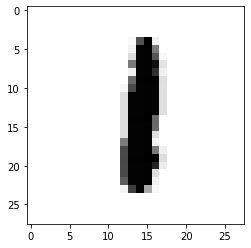

In [24]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())
    
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()